In [2]:
import numpy as np
seed_value=42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

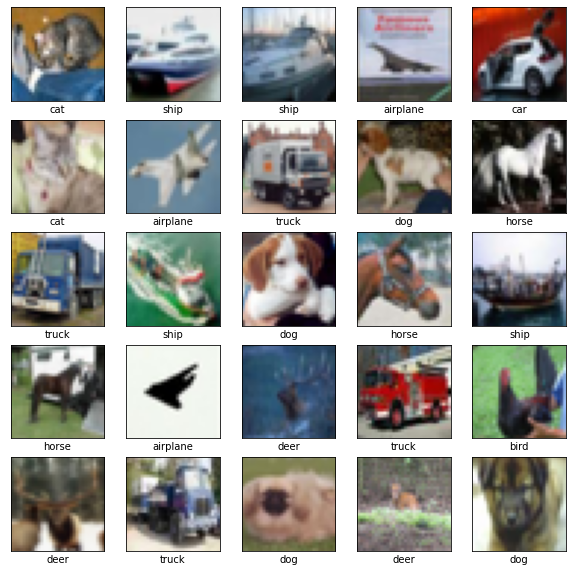

In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten, Dense , BatchNormalization, Dropout, GlobalAveragePooling2D,Lambda

X = np.load('/ml_project/modified_public/xs.npy')
Y = np.load('/ml_project/modified_public/ys.npy')
xt_train = np.load('/ml_project/modified_public/xt_modified.npy')

#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)
x_train = X
y_train = Y

class_names = ['airplane', 'car','bird', 'cat','deer','dog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [4]:
print(x_train.shape)

(52500, 32, 32, 3)


In [5]:
from tensorflow.keras.models import Sequential,Model
# from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     rotation_range=15,
#     horizontal_flip=True,
#     width_shift_range=0.1,
#     height_shift_range=0.1
#     )
# datagen.fit(x_train)

# x_train_rep = np.repeat(x_train, 2, axis=0)
# y_train_rep = np.repeat(y_train, 2, axis=0)

In [6]:
from tensorflow.keras.applications import EfficientNetB0 
from keras.optimizers import Adam

inputs = keras.Input(shape = (32,32,3))

resize = keras.layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear")(inputs)
prep_inputs = Lambda(keras.applications.efficientnet.preprocess_input)(resize)

model_e = EfficientNetB0(
    include_top=False, 
    weights='imagenet',
    input_tensor = prep_inputs,
    pooling=None,
    classes=9, 
    classifier_activation='softmax'
)

model_e.trainable = False

x = model_e.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(9,activation='softmax')(x)

model = keras.Model (model_e.input,x)
model.compile( optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

16711680/16705208 [==============================] - 1s 0us/step


In [7]:
from  tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy',patience = 10 ,restore_best_weights=True)

In [9]:
model.fit(x_train, y_train,
          batch_size=128,
          validation_split=0.15,
          epochs = 20,
          verbose=2,
          callbacks=[early_stopping])

Epoch 1/20
349/349 - 40s - loss: 0.6434 - accuracy: 0.7926 - val_loss: 0.4164 - val_accuracy: 0.8613
Epoch 2/20
349/349 - 38s - loss: 0.4223 - accuracy: 0.8564 - val_loss: 0.3661 - val_accuracy: 0.8737
Epoch 3/20
349/349 - 38s - loss: 0.3805 - accuracy: 0.8684 - val_loss: 0.3443 - val_accuracy: 0.8791
Epoch 4/20
349/349 - 37s - loss: 0.3634 - accuracy: 0.8742 - val_loss: 0.3316 - val_accuracy: 0.8815
Epoch 5/20
349/349 - 38s - loss: 0.3484 - accuracy: 0.8789 - val_loss: 0.3247 - val_accuracy: 0.8820
Epoch 6/20
349/349 - 36s - loss: 0.3370 - accuracy: 0.8828 - val_loss: 0.3197 - val_accuracy: 0.8848
Epoch 7/20
349/349 - 38s - loss: 0.3328 - accuracy: 0.8826 - val_loss: 0.3154 - val_accuracy: 0.8862
Epoch 8/20
349/349 - 39s - loss: 0.3267 - accuracy: 0.8850 - val_loss: 0.3093 - val_accuracy: 0.8886
Epoch 9/20
349/349 - 39s - loss: 0.3205 - accuracy: 0.8868 - val_loss: 0.3055 - val_accuracy: 0.8910
Epoch 10/20
349/349 - 38s - loss: 0.3203 - accuracy: 0.8853 - val_loss: 0.3032 - val_accura

In [10]:
def telegram(message):
    import requests
    CHAT_ID=402107040
    BOT_TOKEN='1486557970:AAFF7Bk9XrsnMN5AxuLRGFIj-iOxhLmwd8s'
    params = {"chat_id": CHAT_ID, "text": str(message)}
    requests.get(f"https://api.telegram.org/bot{BOT_TOKEN}/sendMessage", params=params)
a = model.evaluate(x_test,y_test)
telegram('My accuracy from vast ai: ' +str(a[1]))


NameError: name 'x_test' is not defined

In [13]:
from tensorflow.keras import layers

pure_model = None
pure_model = model

def unfreeze_model(model):
    for layer in model.layers[-30:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    pure_model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

unfreeze_model(model)

epochs = 15
pure_model.fit(x=x_train, y=y_train, epochs=epochs, validation_split=0.15, verbose=2)

Epoch 1/15
1395/1395 - 57s - loss: 0.2692 - accuracy: 0.9041 - val_loss: 0.2331 - val_accuracy: 0.9181
Epoch 2/15
1395/1395 - 56s - loss: 0.1877 - accuracy: 0.9335 - val_loss: 0.2144 - val_accuracy: 0.9256
Epoch 3/15
1395/1395 - 52s - loss: 0.1458 - accuracy: 0.9486 - val_loss: 0.2032 - val_accuracy: 0.9304
Epoch 4/15
1395/1395 - 51s - loss: 0.1183 - accuracy: 0.9579 - val_loss: 0.2045 - val_accuracy: 0.9317
Epoch 5/15
1395/1395 - 57s - loss: 0.0935 - accuracy: 0.9668 - val_loss: 0.1929 - val_accuracy: 0.9371
Epoch 6/15
1395/1395 - 58s - loss: 0.0769 - accuracy: 0.9728 - val_loss: 0.2037 - val_accuracy: 0.9345
Epoch 7/15
1395/1395 - 58s - loss: 0.0678 - accuracy: 0.9769 - val_loss: 0.2020 - val_accuracy: 0.9350
Epoch 8/15
1395/1395 - 59s - loss: 0.0557 - accuracy: 0.9802 - val_loss: 0.2174 - val_accuracy: 0.9390
Epoch 9/15
1395/1395 - 56s - loss: 0.0493 - accuracy: 0.9831 - val_loss: 0.2071 - val_accuracy: 0.9384
Epoch 10/15
1395/1395 - 56s - loss: 0.0457 - accuracy: 0.9845 - val_loss:

In [14]:
pure_model.save('model.h5')

In [16]:
!jupyter nbconvert --to script 'EfficientNet80pretrain.ipynb'

[NbConvertApp] Converting notebook EfficientNet80pretrain.ipynb to script
[NbConvertApp] Writing 3753 bytes to EfficientNet80pretrain.py
